## Artificial Intelligence
## L2 International, Univ.Bordeaux

### Lab #1, Unsupervised Learning
In unsupervised machine learning algorithms, we do not have any supervisor to provide any guidance. We do not have correct answers and algorithms need to discover the interesting pattern in data for learning. One of th most used approaches in this domain is clustering. It aims to divide the set of observations into subsets, called clusters, in such a way that observations in the same cluster are similar and they are dissimilar to the observations in other clusters.

### Exercise 1. K-means
This first example is an adaptation of :
https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_unsupervised_learning_clustering.htm

K-means clustering algorithm is one of the well-known algorithms for clustering the data. The algorithm acts in an iterative way and is parametrised by $K$ : the numbers of clusters we want to get.

1. Import the following python modules: matplotlib.pyplot, seaborn, sns.set(), numpy and Kmeans.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

2. Execute the following code and observe what you obtain:

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples = 500, centers =4,
                      cluster_std = 0.40, random_state = 0)

C:\anaconda3\envs\env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


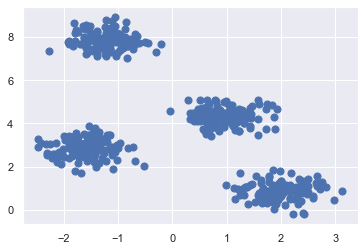

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

It is relatively easy to pick out the four clusters.
3. Initialize km to be the K-means algorithm, with the required parameter of how many clusters(n_clusters).

In [4]:
km = KMeans(n_clusters=4)

4. Train the K-means model with the input data.

In [5]:
km.fit(X)

KMeans(n_clusters=4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

5. Execute the following code to visualize the result of your training:

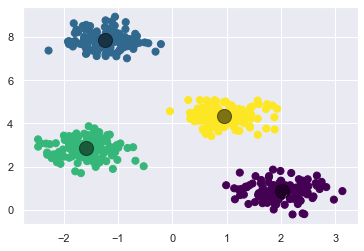

In [8]:
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5);
plt.show()

To summarize: the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.

### Exercise 2. $K$-means Algorithm for Color Compression

One interesting application of clustering is in color compression within images. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.


Execute the following code:

In [15]:
import os
os.getcwd()
os.chdir('C:\\python_data')

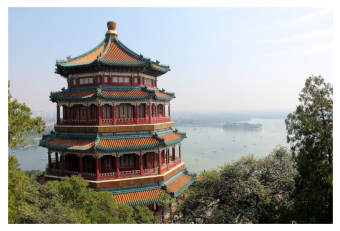

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_sample_image
scene = load_sample_image('china.jpg') 
# sample image라서 디렉토리에서 불러올 필요 없음
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(scene)

It shows an image from datasets of sklearn.
1. Explain the result of the following instruction:

In [21]:
scene.shape

(427, 640, 3)

The image is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255.
2. On can see the image as a set of pixels and hence as a cloud of points in a three dimensional color space. Give the instructions to reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1.

In [45]:
data = scene / 255.0 # use 0...1 scale
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

You can use the function plot_pixels in the given file to visualize a subset of pixels.

In [55]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
        # choose a random subset
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
        
        fig, ax = plt.subplots(1, 2, figsize = (16, 6))
        #print(ax[0])
        ax[0].scatter(R, G, c=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
        
        ax[1].scatter(R, B, c=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
        
        fig.suptitle(title, size=20)
        plt.show();

In [40]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

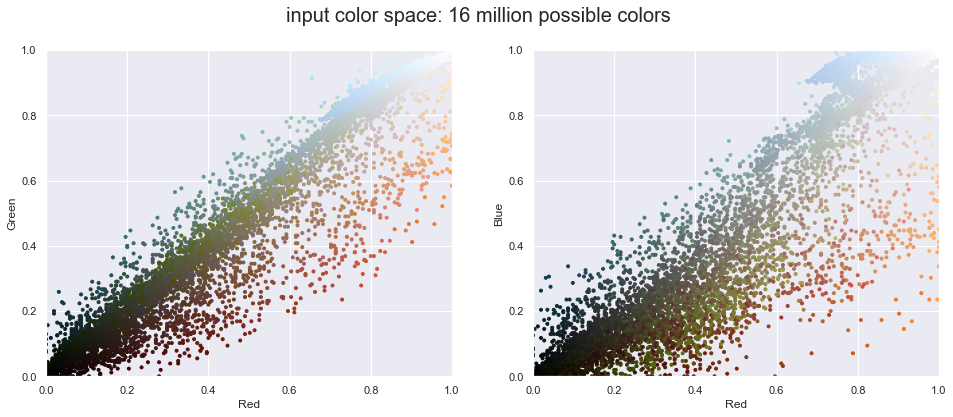

In [47]:
plot_pixels(data, title='input color space: 16 million possible colors')

Now we will use k-means algorithm to reduce these 16 million colors to just 16 colors.
We will use a slightly different implementation of this algorithm. We will use the mini batch k-means which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm.

1. Give python instructions to obtain the new colours (the min batch k-means algorithm is implemented using MiniBatchKMeans function in sklearn.cluster module.

In [51]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues.
    
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [59]:
plot_pixels(data, title="Reduced color space: 16 colors", colors=new_colors)
# 버전 때문에 그래프 출력 안되는듯..?

Execute the following instructions to observe the result:

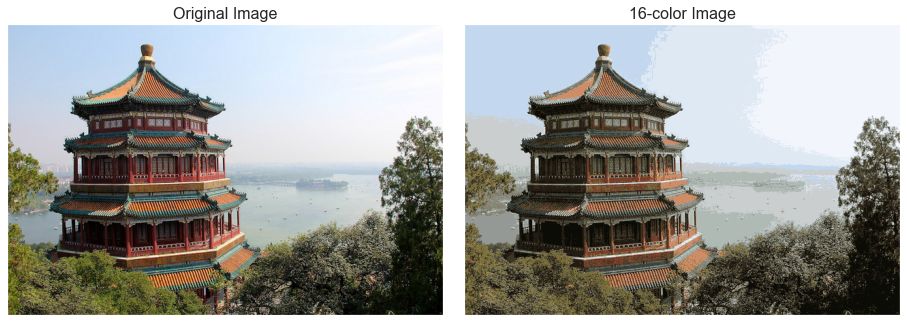

In [54]:
recolored = new_colors.reshape(scene.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(scene)
ax[0].set_title('Original Image', size=16) # 왼쪽 그림만 나옴
ax[1].imshow(recolored)
ax[1].set_title('16-color Image', size=16);

To summarize: Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. 
This image on the right achieves a compression factor of around 1 million! There are certainly better way to compress information in images. But the example shows the power of unsupervised methods like k-means.